In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAMELA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PAMELA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PAMELA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PAMELA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PAMELA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
%matplotlib inline

In [3]:
#reading in the file
tourist_reviews = pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252', skipinitialspace = True)

### Exploring the Dataset

In [4]:
#checking the head of the data
tourist_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
tourist_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [6]:
#checking for null values
tourist_reviews.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [7]:
#Viewing the values in the Review date column 
tourist_reviews['Review Date'].value_counts()

Reviewed 1 week ago             616
Reviewed 2 weeks ago            599
Reviewed 4 weeks ago            570
Reviewed 3 weeks ago            504
Reviewed April 3, 2018          153
                               ... 
Reviewed September 14, 2011       1
Reviewed November 23, 2011        1
Reviewed December 17, 2011        1
Reviewed December 30, 2011        1
Reviewed June 7, 2013             1
Name: Review Date, Length: 2344, dtype: int64

In [8]:
#Viewing the values in the Location column 
tourist_reviews['Location'].value_counts()

Patong              16403
Karon                5826
Kata Beach           5752
Rawai                3811
Choeng Thale         3378
Phuket Town          3356
Kamala               3162
Mai Khao             2372
Cape Panwa           1500
Chalong              1287
Thalang District     1177
Kathu                1078
Nai Yang              996
Nai Harn              881
Bang Tao Beach        600
Karon Beach           397
Wichit                395
Talat Yai             300
Koh Kaew              293
Kata Noi Beach        200
Pa Khlok              100
Ratsada                98
Talat Nuea             97
Nai Thon               94
Sakhu                  91
Name: Location, dtype: int64

In [9]:
#Viewing the values in the Hotel?Restaurant name column 
tourist_reviews['Hotel/Restaurant name'].value_counts()

Da Mario                                             279
Sabai Sabai                                          200
No.6 Restaurant                                      200
The Pizza Company                                    198
The Family Restaurant                                196
                                                    ... 
Sultan's Grill Authentic Turkish & Indian Cuisine     91
Som Restaurant                                        91
Chez Nicolas                                          90
Dada Yura Restaurant                                  80
Chekhoff Restaurant and Bar                           30
Name: Hotel/Restaurant name, Length: 537, dtype: int64

### Selecting Thirty Hotels

In [10]:
#taking a look at the hotels/restaurants that have been reviewed most recently
tourist_reviews[tourist_reviews['Review Date'].str\
                           .contains('Reviewed 1 week ago')]['Hotel/Restaurant name'].value_counts()

Hard Rock Cafe Phuket            37
Tandoori Flames                  22
Naughty Nuri's Phuket            13
Heaven                           12
No.6 Restaurant                  10
                                 ..
Legends Sports Bar & Grill        1
Patong Corner Restaurant          1
Pure Vegan Heaven                 1
Yo Green Restaurant               1
Thong Dee The Kathu Brasserie     1
Name: Hotel/Restaurant name, Length: 235, dtype: int64

In [11]:
#creating a list of the hotels with recent reviews
oneweek = tourist_reviews[tourist_reviews['Review Date'].str\
                           .contains('Reviewed 1 week ago')]['Hotel/Restaurant name'].value_counts().index.tolist()

In [12]:
#selecting thirty hotels with the highest number of most recent reviews
selection = oneweek[:30]

In [13]:
selection

['Hard Rock Cafe Phuket',
 'Tandoori Flames',
 "Naughty Nuri's Phuket",
 'Heaven',
 'No.6 Restaurant',
 'Ken Restaurant',
 'The Tavern',
 'Two Chefs - Karon Beach',
 'Rock Salt',
 'Odysseus Greek Organic Restaurant',
 'The Boathouse Restaurant',
 'Bellini',
 'Mee Ton Poe',
 'Bianconero da Tuveri Restaurant & Pizzeria',
 'Mando Restaurant & Steakhouse',
 'YamThai Restaurant',
 'Golbasi',
 'Red Tuna Restaurant Phuket',
 'Da Mario',
 'Bubbles Restaurant',
 'La Gritta',
 'New International Cafe & Bar',
 'Red Corner',
 'Palm Square',
 'MaMa Jin Restaurant',
 "Sultan's Grill Authentic Turkish & Indian Cuisine",
 'Golden Paradise Restaurant',
 'Cafe del Mar Phuket',
 'Veranda',
 'Highway Curry Indian & Thai Cuisine']

In [14]:
reviews = tourist_reviews[tourist_reviews['Hotel/Restaurant name'].isin(selection)]

In [15]:
reviews

,ID,Review Date,Location,Hotel/Restaurant name,Review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
...,...,...,...,...,...
47253,rn563647994,"Reviewed March 1, 2018",Kamala,Heaven,Passed by here on a Thursday afternoon for sun...
47254,rn562680923,"Reviewed February 25, 2018",Kamala,Heaven,"With a great view of several beaches, a great ..."
47255,rn562079885,"Reviewed February 22, 2018",Kamala,Heaven,Food isn’t bad but it isn’t as good as adverti...
47256,rn559720518,"Reviewed February 10, 2018",Kamala,Heaven,We would recommend arriving around 5 pm to see...


## Sentiment Analysis

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()

In [17]:
reviews['compound'] = reviews['Review'].apply(sent_analyzer.polarity_scores).apply(lambda x: x['compound'])
reviews['neg'] = reviews['Review'].apply(sent_analyzer.polarity_scores).apply(lambda x: x['neg'])
reviews['neu'] = reviews['Review'].apply(sent_analyzer.polarity_scores).apply(lambda x: x['neu'])
reviews['pos'] = reviews['Review'].apply(sent_analyzer.polarity_scores).apply(lambda x: x['pos'])


C:\Users\PAMELA\AppData\Local\Temp/ipykernel_5488/510777421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['compound'] = reviews['Review'].apply(sent_analyzer.polarity_scores).apply(lambda x: x['compound'])
C:\Users\PAMELA\AppData\Local\Temp/ipykernel_5488/510777421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['neg'] = reviews['Review'].apply(sent_analyzer.polarity_scores).apply(lambda x: x['neg'])
C:\Users\PAMELA\AppData\Local\Temp/ipykernel_5488/510777421.py:3: SettingWithCopyW

In [18]:
reviews

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,0.000,0.525,0.475
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,0.000,0.503,0.497
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,0.000,0.502,0.498
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,0.000,0.783,0.217
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,0.045,0.777,0.178
...,...,...,...,...,...,...,...,...,...
47253,rn563647994,"Reviewed March 1, 2018",Kamala,Heaven,Passed by here on a Thursday afternoon for sun...,0.8442,0.000,0.816,0.184
47254,rn562680923,"Reviewed February 25, 2018",Kamala,Heaven,"With a great view of several beaches, a great ...",0.9428,0.000,0.582,0.418
47255,rn562079885,"Reviewed February 22, 2018",Kamala,Heaven,Food isn’t bad but it isn’t as good as adverti...,0.7430,0.043,0.811,0.146
47256,rn559720518,"Reviewed February 10, 2018",Kamala,Heaven,We would recommend arriving around 5 pm to see...,0.8439,0.000,0.815,0.185


## Analysis

In [19]:
#Creating a dataframe of the total number of reviews
total = reviews.groupby(reviews['Hotel/Restaurant name']).count()['Review'].sort_values(ascending = False)\
                .to_frame(name = 'total').reset_index()

total.head()

,Hotel/Restaurant name,total
0,Da Mario,279
1,No.6 Restaurant,200
2,Naughty Nuri's Phuket,100
3,Mando Restaurant & Steakhouse,100
4,Two Chefs - Karon Beach,100


In [20]:
#Creating a dataframe of the number of negative reviews
negative = (reviews["compound"]<0).groupby(reviews['Hotel/Restaurant name'])\
            .sum().sort_values(ascending = False)\
            .to_frame(name = 'negative').reset_index()

negative.head()

,Hotel/Restaurant name,negative
0,Da Mario,31
1,Veranda,21
2,Cafe del Mar Phuket,18
3,No.6 Restaurant,14
4,Bellini,11


In [21]:
#Creating a dataframe of the number of neutral reviews
neutral = (reviews["compound"]==0).groupby(reviews['Hotel/Restaurant name'])\
            .sum().sort_values(ascending = False)\
            .to_frame(name = 'neutral').reset_index()

neutral.head()

,Hotel/Restaurant name,neutral
0,Da Mario,18
1,Red Tuna Restaurant Phuket,6
2,No.6 Restaurant,4
3,Bellini,3
4,Mee Ton Poe,3


In [22]:
#Creating a dataframe of the number of positive reviews
positive = (reviews["compound"]>0).groupby(reviews['Hotel/Restaurant name'])\
            .sum().sort_values(ascending = False)\
            .to_frame(name = 'positive').reset_index()

positive.head()

,Hotel/Restaurant name,positive
0,Da Mario,230
1,No.6 Restaurant,182
2,Rock Salt,99
3,Odysseus Greek Organic Restaurant,98
4,Highway Curry Indian & Thai Cuisine,97


In [23]:
#Combining all dataframes into a single dataframe
all_reviews = pd.merge(neutral, positive, how= 'inner', on = 'Hotel/Restaurant name' )\
              .merge(negative, how= 'inner', on = 'Hotel/Restaurant name' )\
              .merge(total, how= 'inner', on = 'Hotel/Restaurant name' )

In [24]:
all_reviews.sort_values(by = 'total', ascending = False)

,Hotel/Restaurant name,neutral,positive,negative,total
0,Da Mario,18,230,31,279
2,No.6 Restaurant,4,182,14,200
12,Cafe del Mar Phuket,2,80,18,100
28,Two Chefs - Karon Beach,0,96,4,100
25,Rock Salt,0,99,1,100
23,Odysseus Greek Organic Restaurant,0,98,2,100
22,MaMa Jin Restaurant,1,94,5,100
21,Mando Restaurant & Steakhouse,1,97,2,100
20,Golden Paradise Restaurant,1,96,3,100
16,Tandoori Flames,1,96,3,100


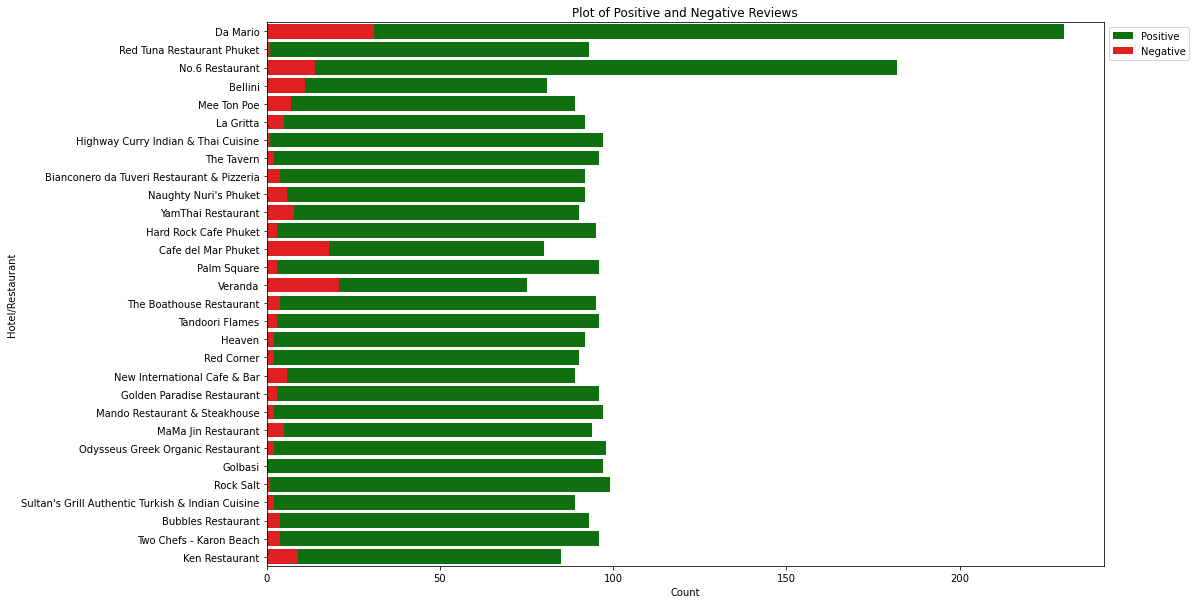

In [25]:
#Visualizing the number of positive and negative reviews

plt.figure(figsize= (15,10))

bar_plot1 = sns.barplot(y='Hotel/Restaurant name', x='positive', data=all_reviews, label="Positive", color="g")
bar_plot2 = sns.barplot(y='Hotel/Restaurant name', x='negative', data=all_reviews, label="Negative", color="r")

plt.title('Plot of Positive and Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Hotel/Restaurant')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

In [26]:
#Creating a new column of the percentage of negative reviews 
all_reviews['% negative'] = (all_reviews['negative']/all_reviews['total'])*100

Text(0, 0.5, 'Hotel/Restaurant')

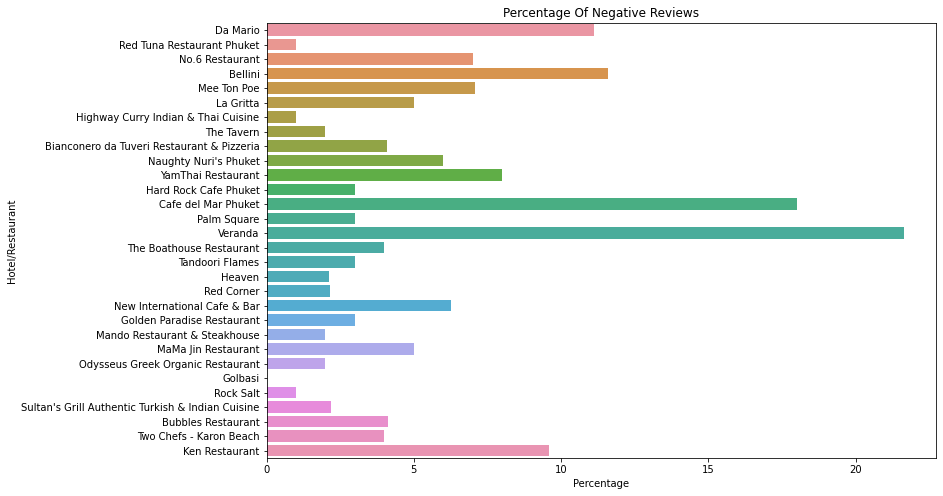

In [27]:
#Visualizing the percentage of negative reviews in a barplot
plt.figure(figsize= (12,8))
sns.barplot(x = '% negative', y = 'Hotel/Restaurant name', data = all_reviews)
plt.title('Percentage Of Negative Reviews')
plt.xlabel('Percentage')
plt.ylabel('Hotel/Restaurant')

In [28]:
#Creating a function that processes the text in a way that meaningful insights can be extracted from it
def text_preprocessing(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenization
    
    stop_words = nltk.corpus.stopwords.words('english')
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Removing stopwords
    
    from nltk.stem.snowball import SnowballStemmer
    snow_stemmer = SnowballStemmer(language='english')
    stemmed_text = [snow_stemmer.stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

In [29]:
#Creating a column that contains the processed text
reviews['processed_review'] = reviews['Review'].apply(text_preprocessing)

C:\Users\PAMELA\AppData\Local\Temp/ipykernel_5488/953812074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['processed_review'] = reviews['Review'].apply(text_preprocessing)


In [30]:
reviews

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,0.000,0.525,0.475,"[food, tasti, fresh, fast, servic, owner, supe..."
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,0.000,0.503,0.497,"[great, varieti, greek, dish, fantast, servic,..."
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,0.000,0.502,0.498,"[excel, culinari, experi, new, restaur, phuket..."
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,0.000,0.783,0.217,"[amaz, servic, food, high, recommend, look, ge..."
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,0.045,0.777,0.178,"[restaur, tuck, away, near, squar, went, trip,..."
...,...,...,...,...,...,...,...,...,...,...
47253,rn563647994,"Reviewed March 1, 2018",Kamala,Heaven,Passed by here on a Thursday afternoon for sun...,0.8442,0.000,0.816,0.184,"[pass, thursday, afternoon, sunset, drink, gor..."
47254,rn562680923,"Reviewed February 25, 2018",Kamala,Heaven,"With a great view of several beaches, a great ...",0.9428,0.000,0.582,0.418,"[great, view, sever, beach, great, ambianc, mu..."
47255,rn562079885,"Reviewed February 22, 2018",Kamala,Heaven,Food isn’t bad but it isn’t as good as adverti...,0.7430,0.043,0.811,0.146,"[food, bad, good, advertis, trip, advis, waito..."
47256,rn559720518,"Reviewed February 10, 2018",Kamala,Heaven,We would recommend arriving around 5 pm to see...,0.8439,0.000,0.815,0.185,"[would, recommend, arriv, around, 5, pm, see, ..."


In [31]:
#Creating a subset of negative reviews
negative_reviews = reviews.loc[reviews['compound']<0]

In [32]:
negative_reviews

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
130,rn575120133,Reviewed 3 weeks ago,Kata Beach,Odysseus Greek Organic Restaurant,Had high expectations with all the good review...,-0.6318,0.262,0.631,0.108,"[high, expect, good, review, disappoint, also,..."
159,rn571208476,"Reviewed April 5, 2018",Kata Beach,Odysseus Greek Organic Restaurant,Very hospitable and desperate chief. Small gre...,-0.4321,0.120,0.880,0.000,"[hospit, desper, chief, small, green, corner, ..."
467,rn555105960,"Reviewed January 21, 2018",Kata Beach,The Tavern,well our time in phuket is coming to a close a...,-0.3182,0.073,0.882,0.045,"[well, time, phuket, come, close, would, crimi..."
488,rn541136243,"Reviewed November 15, 2017",Kata Beach,The Tavern,I've been coming to Thailand for nearly 20 yea...,-0.2500,0.069,0.863,0.069,"[i'v, come, thailand, near, 20, year, wife, de..."
1485,rn537109423,"Reviewed October 30, 2017",Patong,Highway Curry Indian & Thai Cuisine,Absolutely without a doubt the best Indian foo...,-0.7324,0.220,0.719,0.061,"[absolut, without, doubt, best, indian, food, ..."
...,...,...,...,...,...,...,...,...,...,...
45687,rn258411451,"Reviewed March 8, 2015",Karon,Da Mario,I wanted to know what wine they had and the it...,-0.8020,0.254,0.681,0.065,"[want, know, wine, italian, waiter, sad, itali..."
45698,rn155492731,"Reviewed March 24, 2013",Karon,Da Mario,"As we entered we were the only guests, which s...",-0.5267,0.087,0.877,0.037,"[enter, guest, made, staff, eager, hear, backg..."
45699,rn154244562,"Reviewed March 11, 2013",Karon,Da Mario,Had a craving for pizza so we tried this place...,-0.0387,0.050,0.904,0.046,"[crave, pizza, tri, place, pretti, atmospher, ..."
47201,rn272082650,"Reviewed May 14, 2015",Kamala,Heaven,Where do I start?\r\nWas it the total lack of ...,-0.8677,0.196,0.804,0.000,"[start, total, lack, servic, obnoxi, loud, rus..."


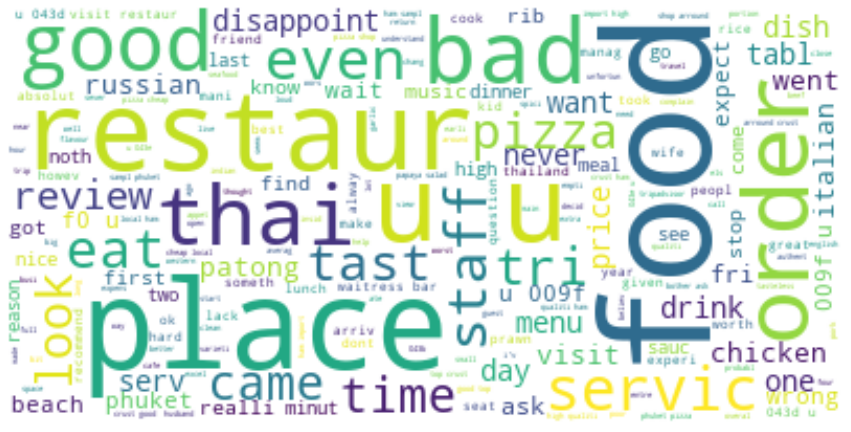

In [33]:
#Creating a wordcloud of the most frequently used words in negative reviews
negative_tokens =  [word for review in negative_reviews['processed_review'] for word in review]

negative_wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(negative_tokens))

plt.figure(figsize= (15,12))
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [34]:
#Creating a subset of positive reviews
positive_reviews = reviews.loc[reviews['compound']>0]

In [35]:
positive_reviews

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,0.000,0.525,0.475,"[food, tasti, fresh, fast, servic, owner, supe..."
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,0.000,0.503,0.497,"[great, varieti, greek, dish, fantast, servic,..."
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,0.000,0.502,0.498,"[excel, culinari, experi, new, restaur, phuket..."
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,0.000,0.783,0.217,"[amaz, servic, food, high, recommend, look, ge..."
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,0.045,0.777,0.178,"[restaur, tuck, away, near, squar, went, trip,..."
...,...,...,...,...,...,...,...,...,...,...
47253,rn563647994,"Reviewed March 1, 2018",Kamala,Heaven,Passed by here on a Thursday afternoon for sun...,0.8442,0.000,0.816,0.184,"[pass, thursday, afternoon, sunset, drink, gor..."
47254,rn562680923,"Reviewed February 25, 2018",Kamala,Heaven,"With a great view of several beaches, a great ...",0.9428,0.000,0.582,0.418,"[great, view, sever, beach, great, ambianc, mu..."
47255,rn562079885,"Reviewed February 22, 2018",Kamala,Heaven,Food isn’t bad but it isn’t as good as adverti...,0.7430,0.043,0.811,0.146,"[food, bad, good, advertis, trip, advis, waito..."
47256,rn559720518,"Reviewed February 10, 2018",Kamala,Heaven,We would recommend arriving around 5 pm to see...,0.8439,0.000,0.815,0.185,"[would, recommend, arriv, around, 5, pm, see, ..."


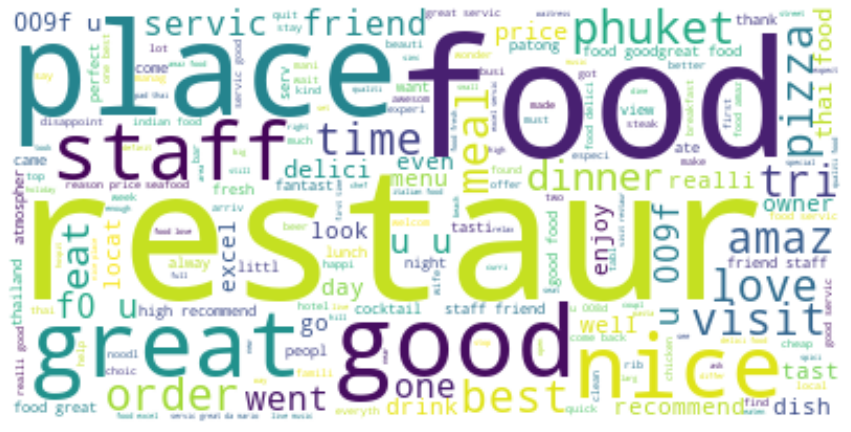

In [36]:
#Creating a wordcloud of the most frequently used words in positive reviews
positive_tokens =  [word for review in positive_reviews['processed_review'] for word in review]

positive_wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(positive_tokens))

plt.figure(figsize= (15,12))
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()